#Pre-processing Data

##Importing all used libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('dataset.csv') #reading dataset

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


##Encoding

###Binary Encoding

Note that most of the columns have categorical (in strings) and binary values. Therefore, we will encode these values ​​in binary form, replacing "yes" with 1 and "no" with 0.

This will just not be done for the "Gender" column, since this type of coding is not the most suitable for the case.

In [ ]:
df["Polyuria"] = np.where(df["Polyuria"].str.contains("Yes"), 1, 0)
df["Polydipsia"] = np.where(df["Polydipsia"].str.contains("Yes"), 1, 0)
df["sudden weight loss"] = np.where(df["sudden weight loss"].str.contains("Yes"), 1, 0)
df["weakness"] = np.where(df["weakness"].str.contains("Yes"), 1, 0)
df["Polyphagia"] = np.where(df["Polyphagia"].str.contains("Yes"), 1, 0)
df["Genital thrush"] = np.where(df["Genital thrush"].str.contains("Yes"), 1, 0)
df["visual blurring"] = np.where(df["visual blurring"].str.contains("Yes"), 1, 0)
df["Itching"] = np.where(df["Itching"].str.contains("Yes"), 1, 0)
df["Irritability"] = np.where(df["Irritability"].str.contains("Yes"), 1, 0)
df["delayed healing"] = np.where(df["delayed healing"].str.contains("Yes"), 1, 0)
df["partial paresis"] = np.where(df["partial paresis"].str.contains("Yes"), 1, 0)
df["muscle stiffness"] = np.where(df["muscle stiffness"].str.contains("Yes"), 1, 0)
df["Alopecia"] = np.where(df["Alopecia"].str.contains("Yes"), 1, 0)
df["Obesity"] = np.where(df["Obesity"].str.contains("Yes"), 1, 0)
df["class"] = np.where(df["class"].str.contains("Positive"), 1, 0)

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


###OneHot Encoding

Now, we will do the coding of the gender column. Note that this column should not be coded as in the previous form, as there is no ordinal relationship between the data - "male" or "female".

Therefore, we will use one-hot coding, which will create a binary column for each category and return a sparse or dense matrix.

In [ ]:
gender_encoding = pd.get_dummies(df['Gender']) #making another dataset - gender_encoding -, with the one-hot encoding of 'Gender' column

In [ ]:
gender_encoding  #seeing the new dataset

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
515,1,0
516,1,0
517,1,0
518,1,0


In [ ]:
df = df.join(gender_encoding) #join both dataset in one

In [ ]:
df.head() # seeing the result dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Female,Male
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1


In [ ]:
df.drop(columns='Gender', inplace=True) #deleting the original "Gender" column

In [ ]:
df.head() #seeing the result

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Female,Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1


##Feature Selection

At this point, we will analyze the quality and the correlation between the data, so that we can choose the best features for the construction of the models.
For this, we will use heat map, feature importance and zeros or NaN counts.

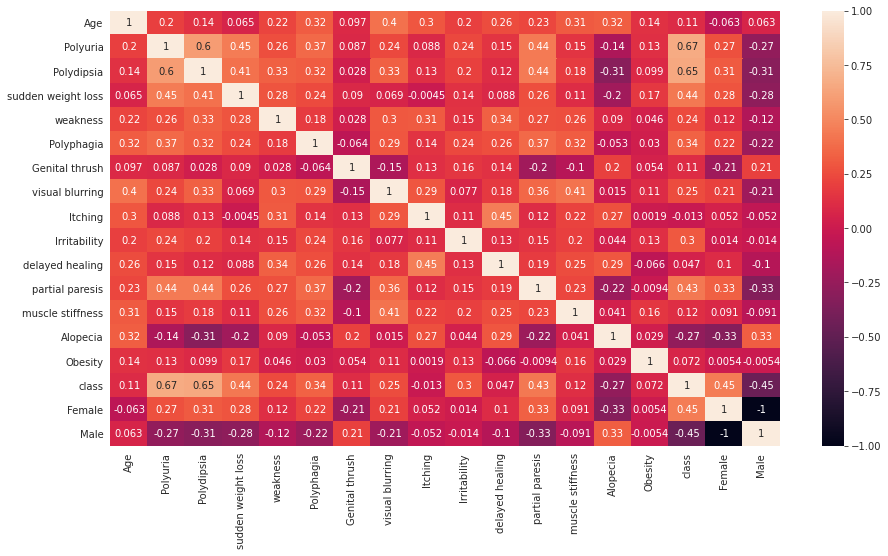

In [ ]:
# plotting the correlation matrix:
corrdata = df.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

[0.05097609 0.21797153 0.21605138 0.04184536 0.01646506 0.02934283
 0.02312446 0.02724427 0.03306622 0.04662056 0.03401976 0.0425994
 0.02589803 0.03972478 0.02042531 0.07164814 0.06297684]


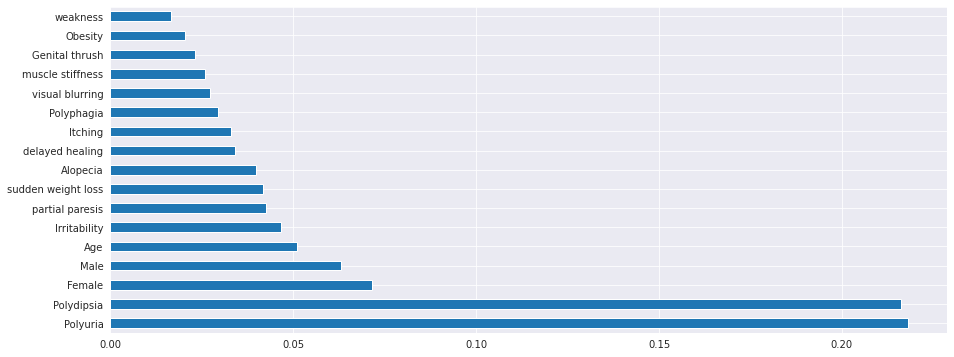

In [ ]:
# features importance:

y = df["class"]                                                               #target

features = list(df.columns)                                                   #list of features
features.remove("class")                                                      #removing target from the list
x = df[features]                                                              #only features dataset

model = ExtraTreesClassifier()                                                #using a ExtraTreeClassifier to estimate features importance
model.fit(x,y)                                                                #training
print(model.feature_importances_)                                             #printing and plotting
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [ ]:
# checking for missing data:
df.isna().sum()

Age                   0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
Female                0
Male                  0
dtype: int64

In [ ]:
# checking for non-zero values:
df.astype(bool).sum(axis=0)

Age                   520
Polyuria              258
Polydipsia            233
sudden weight loss    217
weakness              305
Polyphagia            237
Genital thrush        116
visual blurring       233
Itching               253
Irritability          126
delayed healing       239
partial paresis       224
muscle stiffness      195
Alopecia              179
Obesity                88
class                 320
Female                192
Male                  328
dtype: int64

##Final Dataset

In [ ]:
final_features = ['Age', 'Polyuria', 'Polydipsia', 'Female', 'Male', 'class'] #list of chosen features

In [ ]:
df = df[final_features] #creating the dataset with just the chosen features

In [ ]:
df.head() #seeing it

,Age,Polyuria,Polydipsia,Female,Male,class
0,40,0,1,0,1,1
1,58,0,0,0,1,1
2,41,1,0,0,1,1
3,45,0,0,0,1,1
4,60,1,1,0,1,1


MinMaxScaler

In [ ]:
scaler = MinMaxScaler()     #creating the object that makes the transformation
scaler.fit(df)              #calculating
df2 = scaler.transform(df)  #applying

In [ ]:
final_df = pd.DataFrame(df2, columns=df.columns)  #transforming the result array - df2 - in the final dataset (pd.DataFrame)
final_df.head()                                   #seeing it

,Age,Polyuria,Polydipsia,Female,Male,class
0,0.324324,0.0,1.0,0.0,1.0,1.0
1,0.567568,0.0,0.0,0.0,1.0,1.0
2,0.337838,1.0,0.0,0.0,1.0,1.0
3,0.391892,0.0,0.0,0.0,1.0,1.0
4,0.594595,1.0,1.0,0.0,1.0,1.0


In [ ]:
# saving the pd.DataFrame as a csv file:
final_df.to_csv(sep=',')
compression_opts = dict(method='zip', archive_name='final_dataset.csv')
final_df.to_csv('final_dataset.zip', index=False, compression=compression_opts)  